# Plan Phase

## Common QnA after Data Understanding
- What is the purpose of this model?
- How will its predictions be used?
- Who is affected?
- How harmful/significant could the effects be?
- What types of results from the model are needed?
- What type of Model will you need?
- Online Machine Learning or Offline Learning?
- Instance based learning or Model based learning?
- Figure out tools you need

Answers are written in plan_phase.md document. Checkout: https://github.com/se-iram/Laptop-Price-Predictor/blob/main/docs/plan_phase.md

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv('../data/laptop_data.csv')

In [3]:
df.head(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
5,5,Acer,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,21312.0000
6,6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,114017.6016
7,7,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,61735.5360
8,8,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,79653.6000
9,9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,41025.6000


In [4]:
# no of rows and no of cols
df.shape

(1303, 12)

In [5]:
# information for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
# check no. of duplicate rows
df.duplicated().sum()

np.int64(0)

**Data Understanding**

- **Dataset Size:** The dataset contains **1303 rows** and **12 columns**, which is relatively small. This indicates that **offline (batch) learning** approaches are appropriate.  
- **Unnecessary Columns:** Some columns, such as the `Unnamed` column, are irrelevant and should be removed to simplify the dataset.  
- **Feature Engineering Needs:** Several columns contain **hidden information** that can be extracted:
  - **Screen Resolution:** Contains details like **IPS type** and **actual resolution**, which can be separated into meaningful features.  
  - **CPU and GPU Columns:** Contain multiple pieces of information such as brand, model, and generation, which can be parsed into separate features for better analysis.  
- **Data Type Issues:**  
  - **RAM Column:** Currently stored as an object due to the `'GB'` suffix; needs conversion to **integer**.  
  - **Weight Column:** Currently stored as an object due to the `'kg'` suffix; needs conversion to **float**.  
- **Data Quality:**  
  - **No duplicate rows** exist in the dataset.  
  - **No missing values** are present, which simplifies preprocessing.  


# Analyze Phase

## Data Cleaning & Preprocessing

In [7]:
# drop unnecessary column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
# Remove 'GB' and 'kg' strings from each value of Ram and weight columns
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')

In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
print(df['Ram'].dtype)
print(df['Weight'].dtype)

object
object


In [12]:
# Now change their data types from object to numerical
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## Expolatory Data Analysis

In [14]:
import seaborn as sns

In [15]:
import matplotlib.pyplot as plt

## Univariate Analysis

**Categorical data**

<Axes: xlabel='Company'>

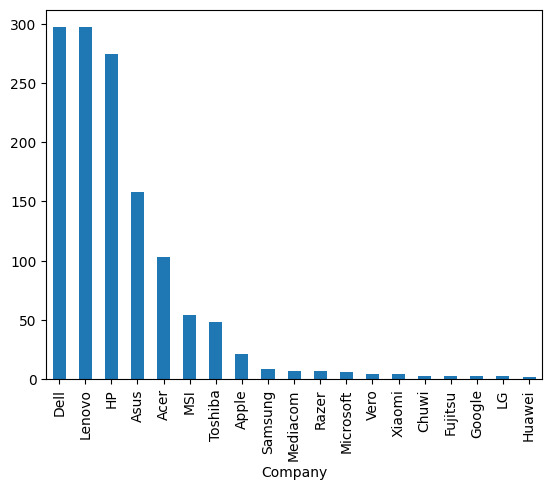

In [16]:
df['Company'].value_counts().plot(kind='bar')

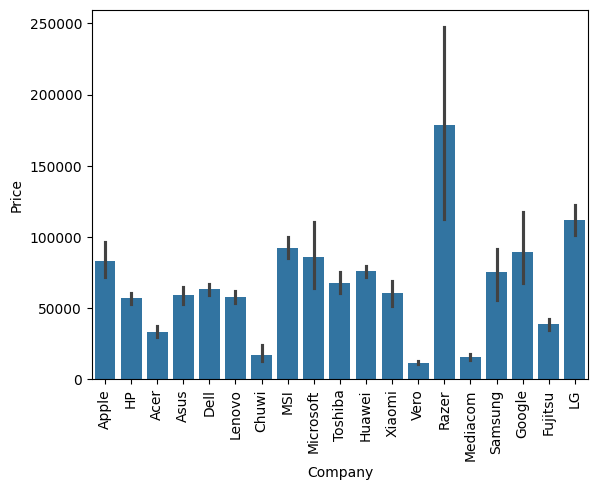

In [17]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Company Analysis**
- **Distribution of Laptops by Company:**  
  A bar graph of the `Company` column shows that most laptops in the dataset belong to **Dell, Lenovo, and HP**. Brands like **Asus** and **Acer** come next, while some companies have only a few laptops. This indicates an **uneven distribution** of data across brands.  

- **Price Variation by Company:**  
  Analyzing the bar graph with `Company` on the x-axis and `Price` on the y-axis reveals:
  - On average, **Razer** laptops are the most expensive.  
  - **LG, Google, Microsoft, and Samsung** laptops are also priced higher than most other brands.  

- **Conclusion:**  
  There is a **clear variation in laptop prices across different companies**, indicating that the brand plays a significant role in pricing. Therefore, when purchasing a laptop, the **company or brand is an important factor** influencing cost.

<Axes: xlabel='count', ylabel='TypeName'>

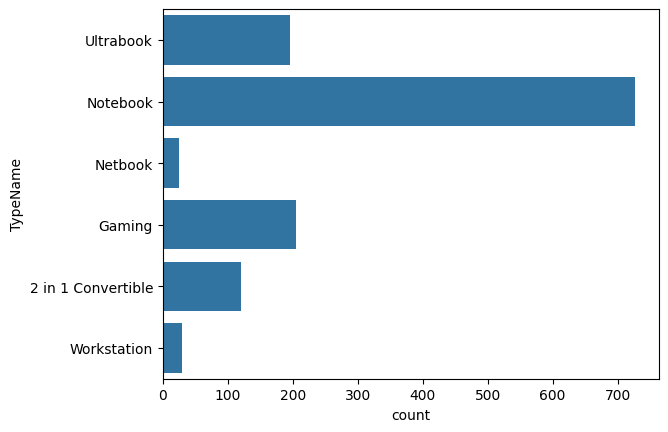

In [18]:
sns.countplot(df['TypeName'])

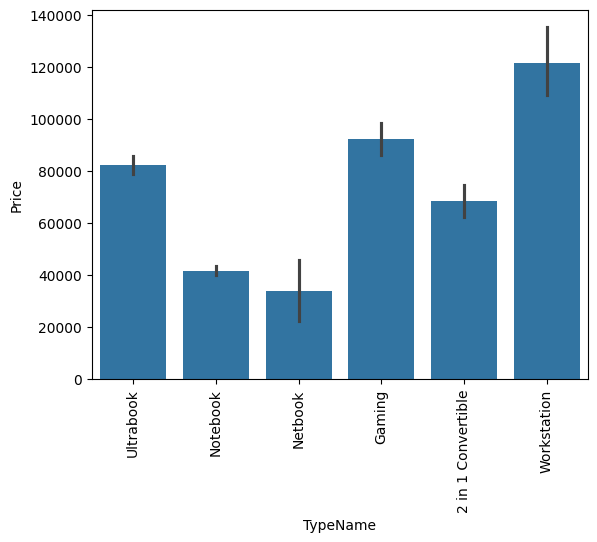

In [19]:
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**TypeName Analysis**
- **Price Distribution by Laptop Type:**  
  A bar graph plotting `TypeName` against `Price` shows that:
  - **Workstations** are the most expensive laptops on average, but their **count is very low** in the dataset.  
  - **Notebooks** are the most common type of laptops. They are generally **budget-friendly**, cheaper than workstations but more expensive than netbooks.  
  - **Netbooks** are cheaper, but there are very **few laptops of this type**, likely because they are less desirable due to low performance.  
  - **Gaming laptops** and **Ultrabooks** are also expensive compared to notebooks, but their counts are smaller.  

- **Conclusion:**  
  The `TypeName` column has a **significant impact on price**. The type of laptop being purchased (workstation, notebook, gaming, ultrabook, etc.) strongly influences its cost and popularity among users.


**Numerical data**

<Axes: xlabel='Inches', ylabel='Price'>

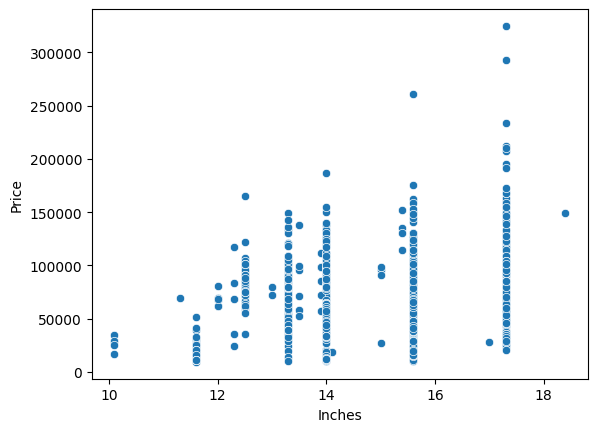

In [20]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

- so we can see that if laptop size is much higher price is also high and if laptop size is very small than price is low but all laptop sizes which is medium have almost a similar price range
- but yeah laptop size affects prices
- we can say that there is relation between size and price but not too much strong

In [21]:
# ScreenResolution column
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

Information hidden: IPS Panel, Touchscreen and resolution

So we will perform Feature Engineering on ScreenResolution col


## Feature Engineering (Selection, Transformation, Extraction)

**Feature Extraction:**
Extract features `TouchScreen`, `IPS`, `X_res` and `Y_res` from `ScreenResolution` feature

In [22]:
# New column for TouchScreen
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [23]:
df['TouchScreen'].value_counts()

TouchScreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='TouchScreen', ylabel='Price'>

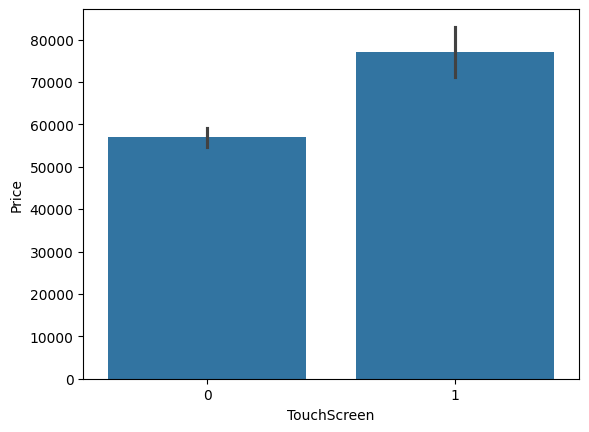

In [24]:
sns.barplot(x=df['TouchScreen'], y=df['Price'])

So on average touchscreen laptops have high prices than non-touchscreen laptops

In [25]:
# New column for IPS Panel
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [26]:
df['IPS'].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

<Axes: xlabel='IPS', ylabel='Price'>

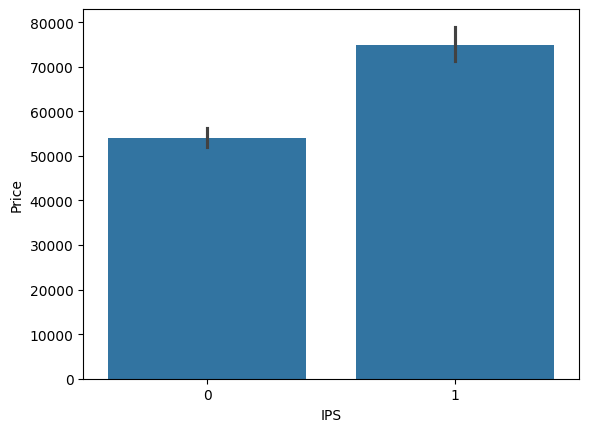

In [27]:
sns.barplot(x=df['IPS'], y=df['Price'])

So on average laptops with IPS panel have high prices

In [28]:
# Break ScreenResolution into two columns X_res and Y_res
df[['X_res', 'Y_res']] = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [29]:
# Now X_res contains raw data with resolution digit so we will use a regex expression to extract digits
df['X_res'] = df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [30]:
df['X_res'].dtype

dtype('O')

In [31]:
# convert data type 
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [33]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

X_res and Y_res columns have strong relation with price

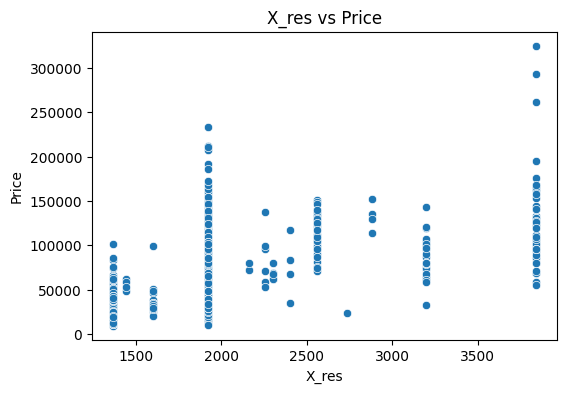

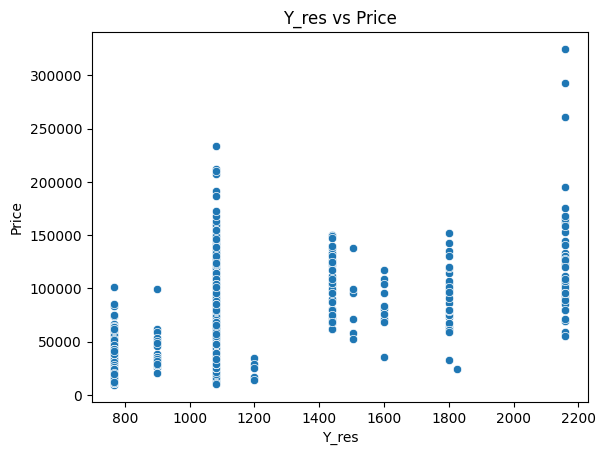

In [34]:
# X_res vs Price
plt.figure(figsize=(6,4))
sns.scatterplot(x='X_res', y='Price', data=df)
plt.title("X_res vs Price")
plt.show()

# Y_res vs Price
sns.scatterplot(x='Y_res', y='Price', data=df)
plt.title("Y_res vs Price")
plt.show()

**Feature Construction:** 
Create a new feature `PPI` by combining three features `X_res`, `Y_res` and `Inches`

In [35]:
# Create a new PPI column using X_res, Y_res and Inches columns
# PPI formula: {((X_res)**2 + (Y_res)**2 )** 0.5 } / Inches

ppi = (((df['X_res']**2 + df['Y_res']**2) ** 0.5) / df['Inches']).astype(float)
df['PPI'] = ppi.round(2)

In [36]:
df.corr(numeric_only=True)['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473506
Name: Price, dtype: float64

**Feature Selection:** Select `PPI` feature and drop other features

- We noticed that X_res, Y_res, and Inches each had some correlation with laptop price. However, each of these features alone does not fully capture the screen quality that influences price. For example, a 1920x1080 resolution on a 13-inch laptop looks much sharper than the same resolution on a 17-inch laptop.
- To better represent this relationship, we engineered a new feature called PPI (Pixels Per Inch), which combines resolution and screen size into a single measure of display sharpness. This feature is more directly related to how consumers perceive screen quality, and therefore, is likely a stronger predictor of price.

In [37]:
# we have extracted all the important details from SrcreenResolution Column, so drop it now 
df.drop(columns=['ScreenResolution'], inplace=True)

In [38]:
# also drop X_res, Y_res and Inches cols because we have PPI
df.drop(columns=['Inches', 'X_res', 'Y_res'], inplace=True)

In [39]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
142,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050M,No OS,2.40,46300.3200,0,1,141.21
100,HP,Notebook,Intel Core i7 7500U 2.7GHz,8,256GB SSD,AMD Radeon 530,Windows 10,1.91,38308.3200,0,0,141.21
288,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,62817.1200,0,1,141.21
144,HP,Notebook,AMD A6-Series 9220 2.5GHz,4,256GB SSD,AMD Radeon R4 Graphics,Windows 10,1.86,19660.3200,0,0,100.45
728,Dell,Notebook,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Linux,2.32,31409.6256,0,0,100.45


**CPU Feature**
- **Original CPU Feature:**  
  The raw `CPU` column contains **118 unique string values**, combining **brand, model, and clock speed**.  
  This level of detail is too granular for modeling, making interpretation difficult.  
- **Feature Engineering:**  
  To make the CPU information more meaningful, we **decomposed the original CPU feature** into two new features:
  1. **CPU Brand** – captures the manufacturer of the CPU (e.g., Intel, AMD).  
  2. **CPU Speed** – captures the clock speed of the CPU in GHz.  
- **Benefit:**  
  This decomposition simplifies the data, improves interpretability, and allows the model to focus on the **most relevant CPU characteristics** for predicting laptop price.


In [40]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [41]:
df['BrandName'] = df['Cpu'].apply(lambda x: ' '.join(x.split()[0:3]))

In [42]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,BrandName
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5


In [43]:
df['BrandName'].value_counts()

BrandName
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
AMD A9-Series 9410            3
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
AMD A6-Series A6-9220         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
Intel Xeon E3-1505M           2
Intel Xeon E3-1535M           2
Intel Atom X5-Z8350           2
Intel Atom x5-Z8300           1
AMD E-Series 6110             1
AMD E-Series 9000e            1
AMD E-Series E2-6110          1
AMD FX 9830P                  

In [44]:
def fetch_processor(text):
    # If processor is Intel Core i3/i5/i7, keep as is
    if text in ["Intel Core i3", "Intel Core i5", "Intel Core i7"]:
        return text    
    # If it's Intel, check further
    elif text.split()[0] == "Intel":
        if len(text.split()) > 1 and text.split()[1] == "Celeron":
            return "Intel Celeron"
        else:
            return "Other Intel"    
    # Otherwise, assume AMD (or something else)
    else:
        return "AMD Processor"


In [45]:
df['CpuBrand'] = df['BrandName'].apply(fetch_processor)

In [46]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,BrandName,CpuBrand
525,Lenovo,Notebook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,2.02,71395.20,0,0,157.35,Intel Core i5,Intel Core i5
237,Asus,Notebook,AMD A10-Series A10-9620P 2.5GHz,4,128GB SSD + 1TB HDD,AMD Radeon R5 M430,Windows 10,2.20,30636.00,0,0,141.21,AMD A10-Series A10-9620P,AMD Processor
789,Dell,Gaming,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.62,52480.80,0,0,141.21,Intel Core i5,Intel Core i5
710,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,66546.72,0,1,141.21,Intel Core i7,Intel Core i7
1021,Toshiba,Ultrabook,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.20,84715.20,0,0,165.63,Intel Core i5,Intel Core i5


In [47]:
df['CpuBrand'].value_counts()

CpuBrand
Intel Core i7    527
Intel Core i5    423
Intel Core i3    136
Intel Celeron     88
Other Intel       66
AMD Processor     63
Name: count, dtype: int64

In [48]:
df.drop(columns="BrandName", inplace=True)

In [49]:
# Create a new feature CpuSpeed from Cpu feature
df["CpuSpeed"] = df["Cpu"].str.extract(r'(\d+\.\d+|\d+)GHz')[0].astype(float)

In [50]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuBrand,CpuSpeed
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,2.3
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,1.8
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,2.5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,2.7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,3.1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int32  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float32
 8   Price        1303 non-null   float64
 9   TouchScreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  PPI          1303 non-null   float64
 12  CpuBrand     1303 non-null   object 
 13  CpuSpeed     1303 non-null   float64
dtypes: float32(1), float64(3), int32(1), int64(2), object(7)
memory usage: 132.5+ KB


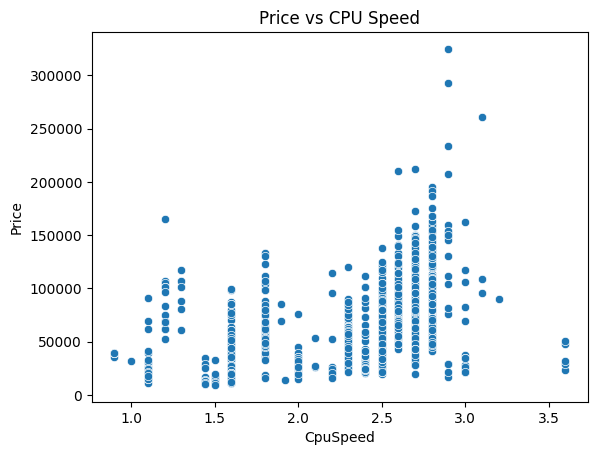

In [52]:
sns.scatterplot(x="CpuSpeed", y="Price", data=df)
plt.title("Price vs CPU Speed")
plt.show()

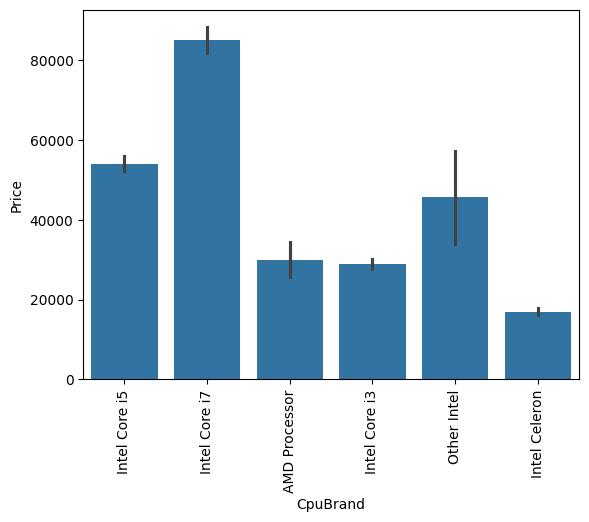

In [53]:
sns.barplot(x=df['CpuBrand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [54]:
df.corr(numeric_only=True)['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
PPI            0.473506
CpuSpeed       0.430293
Name: Price, dtype: float64

**CPU Analysis**
- **CPU Speed vs Price:**  
  The correlation between `CPUSpeed` and `Price` is moderately positive (0.43). This indicates that faster CPUs generally correspond to higher laptop prices, as performance plays a key role in pricing.  
- **CPU Brand vs Price:**  
  The `CPU Brand` also has a strong influence on price. Premium brands and high-end series are associated with higher costs, while entry-level or budget brands correspond to lower prices.  
- **Conclusion:**  
  Both **CPU speed** and **brand** are important features in determining laptop price, making them highly relevant for modeling and analysis.

In [55]:
df.drop(columns='Cpu', inplace=True)

In [56]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuBrand,CpuSpeed
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,2.3
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,1.8
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,2.5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,2.7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,3.1


#### Ram Feature

<Axes: xlabel='Ram'>

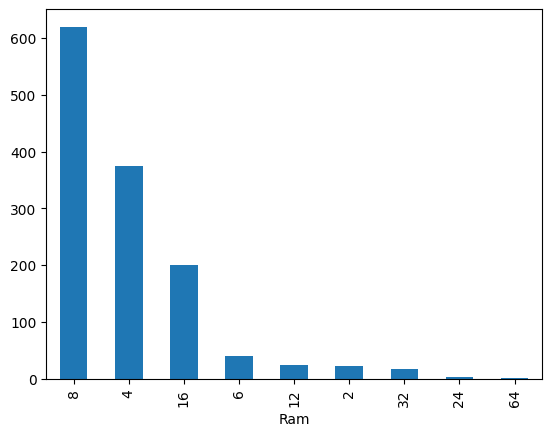

In [57]:
# Ram Feature
df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

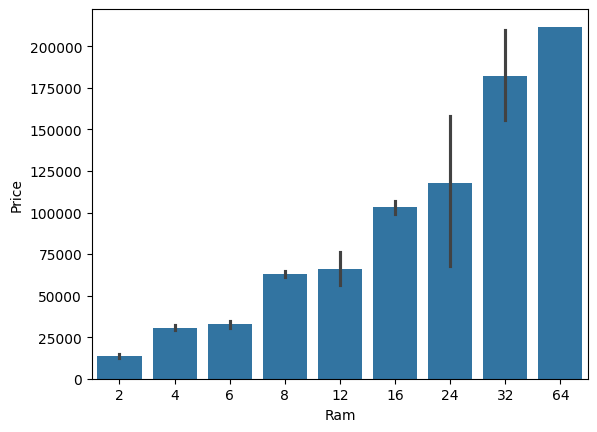

In [58]:
sns.barplot(x=df['Ram'], y=df['Price'])

- Linear relation between Ram and Price
- As Ram increases, Price increases

#### Memory Feature

In [59]:
# Memory feature contains different storage types
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

**Feature Extraction**

Data is too messy in Memory feature we need to transform feature into 4 different columns
Our Goal:
- Create 4 new columns → HDD, SSD, Flash, Hybrid
- Put values in GB only
- If multiple storages exist, fill values in their respective columns.

In [60]:
# Step 1: clean/tidy the Memory text
df['Memory_Clean'] = df['Memory'].str.replace('\xa0', ' ', regex=False).str.replace('Flash Storage', 'Flash', regex=False).str.replace(r'\s*\+\s*', ' + ', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()

In [61]:
df['Memory_Clean'].value_counts()

Memory_Clean
256GB SSD                   412
1TB HDD                     223
500GB HDD                   132
512GB SSD                   118
128GB SSD + 1TB HDD          94
128GB SSD                    76
256GB SSD + 1TB HDD          73
32GB Flash                   38
2TB HDD                      16
64GB Flash                   15
1TB SSD                      14
512GB SSD + 1TB HDD          14
256GB SSD + 2TB HDD          10
1.0TB Hybrid                  9
256GB Flash                   8
16GB Flash                    7
32GB SSD                      6
180GB SSD                     5
128GB Flash                   4
16GB SSD                      3
512GB SSD + 2TB HDD           3
128GB SSD + 2TB HDD           2
256GB SSD + 256GB SSD         2
512GB Flash                   2
1TB SSD + 1TB HDD             2
256GB SSD + 500GB HDD         2
64GB SSD                      1
512GB SSD + 512GB SSD         1
64GB Flash + 1TB HDD          1
1TB HDD + 1TB HDD             1
512GB SSD + 256GB SSD      

In [62]:
# Step 2: Function to normalize units (TB to GB) and then create 4 col
def extract_storage(row):
    hdd, ssd, hybrid, flash = 0, 0, 0, 0
    parts = row.split(" + ")  
    for part in parts:
        part_clean = part.replace("[","").replace("]","").replace(" ","")
        
        # Remove storage type text for size conversion
        size_str = part_clean.replace("HDD","").replace("SSD","").replace("Hybrid","").replace("Flash","")
        
        # Convert to GB
        if "TB" in size_str:
            size = float(size_str.replace("TB","")) * 1024
        elif "GB" in size_str:
            size = float(size_str.replace("GB",""))
        else:
            size = 0
        
        # Assign to correct storage type
        if "HDD" in part:
            hdd += int(size)
        elif "SSD" in part:
            ssd += int(size)
        elif "Hybrid" in part:
            hybrid += int(size)
        elif "Flash" in part:
            flash += int(size)
    
    return pd.Series([hdd, ssd, hybrid, flash])

In [63]:
df[["HDD", "SSD", "Hybrid", "Flash"]] = df["Memory_Clean"].apply(extract_storage)

In [64]:
df.drop(columns=['Memory', 'Memory_Clean'], inplace=True)

In [65]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuBrand,CpuSpeed,HDD,SSD,Hybrid,Flash
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,2.3,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,1.8,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,2.5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,2.7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,3.1,0,256,0,0


In [66]:
df.corr(numeric_only=True)['Price']

Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
PPI            0.473506
CpuSpeed       0.430293
HDD           -0.094856
SSD            0.670682
Hybrid         0.008011
Flash         -0.040511
Name: Price, dtype: float64

**Feature Selection**

- SSD has strong positive correlation (0.67) which means higher SSD capacity generally increases price.
- HDD has slight negative correlation (-0.09) that means more HDD alone does not increase price.
- Hybrid and Flash have almost no correlation so they have less impact on price.
- We can now confidently use SSD and HDD columns for modeling, and drop Hybrid and Flash as they have no correlation.

In [67]:
df.drop(columns=["Hybrid", "Flash"], inplace=True)

In [68]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuBrand,CpuSpeed,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,2.3,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,1.8,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,2.5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,2.7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,3.1,0,256


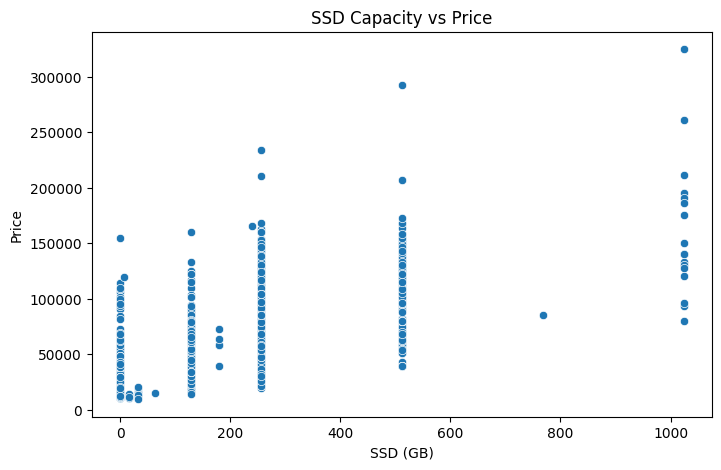

In [69]:
# Scatter plot: SSD vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["SSD"], y=df["Price"])
plt.title("SSD Capacity vs Price")
plt.xlabel("SSD (GB)")
plt.ylabel("Price")
plt.show()

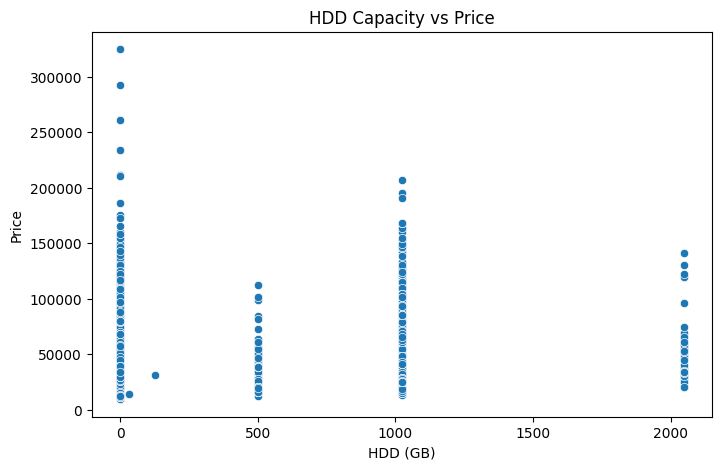

In [70]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["HDD"], y=df["Price"])
plt.title("HDD Capacity vs Price")
plt.xlabel("HDD (GB)")
plt.ylabel("Price")
plt.show()


#### Gpu feature

In [71]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuBrand,CpuSpeed,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,2.3,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,1.8,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,2.5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,2.7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,3.1,0,256


In [72]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [73]:
# we just extract brand naem from Gpu column
df['GpuBrand'] = df['Gpu'].apply(lambda x: x.split()[0])

In [74]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuBrand,CpuSpeed,HDD,SSD,GpuBrand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,2.3,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,1.8,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,2.5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,2.7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,3.1,0,256,Intel


In [75]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [76]:
df[df['GpuBrand'] == 'ARM'] ## remove this row because this is just one laptop whose company name and GpuBrand are unique

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuBrand,CpuSpeed,HDD,SSD,GpuBrand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.51,AMD Processor,2.0,0,0,ARM


In [77]:
df = df[df['GpuBrand'] != 'ARM']

In [78]:
df['GpuBrand'].value_counts()

GpuBrand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

<Axes: xlabel='GpuBrand', ylabel='Price'>

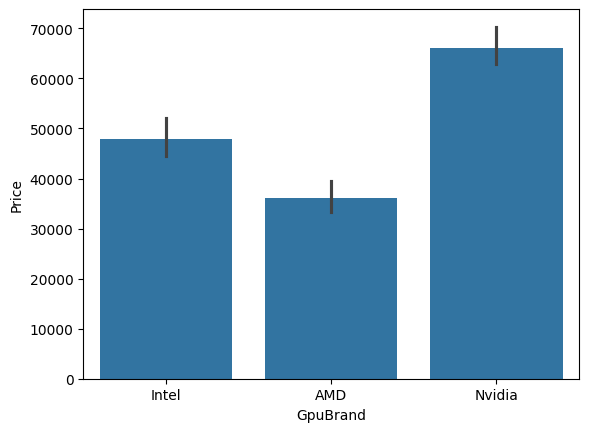

In [79]:
# Analyze relation between GpuBrand and Price
sns.barplot(x=df['GpuBrand'], y=df['Price'], estimator=np.median)

As we can see Gpu Brand affects Price so there is relatio between price and gpu brand

In [80]:
df.drop(columns=['Gpu'], inplace=True)

In [81]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuBrand,CpuSpeed,HDD,SSD,GpuBrand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,2.3,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,1.8,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,2.5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,2.7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,3.1,0,256,Intel


#### OpSys feature

In [82]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

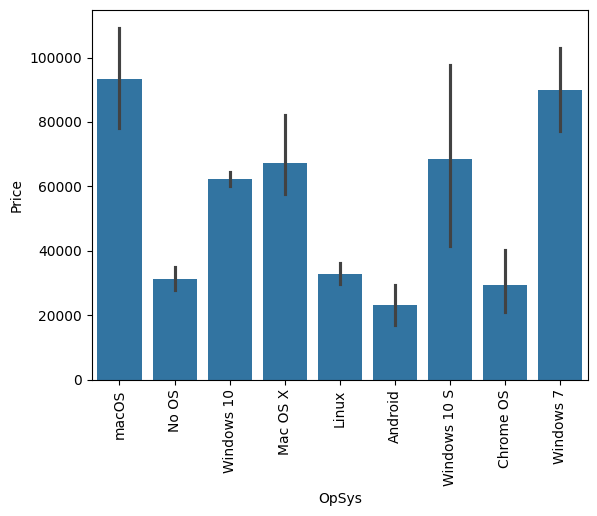

In [83]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

**Feature Transformation:** Transformed the feature `OpSys` from many granular categories to fewer meaningful groups.

We will create three main categories:
- Windows: Windows 10, Windows 10 S and Windows 7 (1072 + 45 + 8 = 1125)
- MacOS: macOS and Mac OS X (13 + 8 = 21)
- Other OS: Linux, Android, Chrome OS and No OS (62+26+2+66 = 156)

In [84]:
 def categories_os(os):
     if os== 'Windows 10' or os== 'Windows 7' or os== 'Windows 10 S':
         return 'Windows'
     elif os== 'macOS' or os== 'Mac OS X':
         return 'MacOS'
     else:
         return "Others/No OS/Linux"

In [85]:
df['OpSys'] = df['OpSys'].apply(categories_os)

In [86]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CpuBrand,CpuSpeed,HDD,SSD,GpuBrand
0,Apple,Ultrabook,8,MacOS,1.37,71378.6832,0,1,226.98,Intel Core i5,2.3,0,128,Intel
1,Apple,Ultrabook,8,MacOS,1.34,47895.5232,0,0,127.68,Intel Core i5,1.8,0,0,Intel
2,HP,Notebook,8,Others/No OS/Linux,1.86,30636.0000,0,0,141.21,Intel Core i5,2.5,0,256,Intel
3,Apple,Ultrabook,16,MacOS,1.83,135195.3360,0,1,220.53,Intel Core i7,2.7,0,512,AMD
4,Apple,Ultrabook,8,MacOS,1.37,96095.8080,0,1,226.98,Intel Core i5,3.1,0,256,Intel


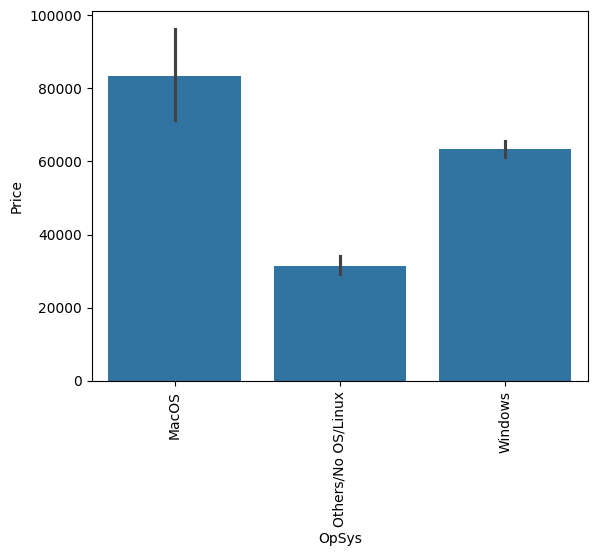

In [87]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

#### Weight feature

C:\Users\PMLS\AppData\Local\Temp\ipykernel_4600\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

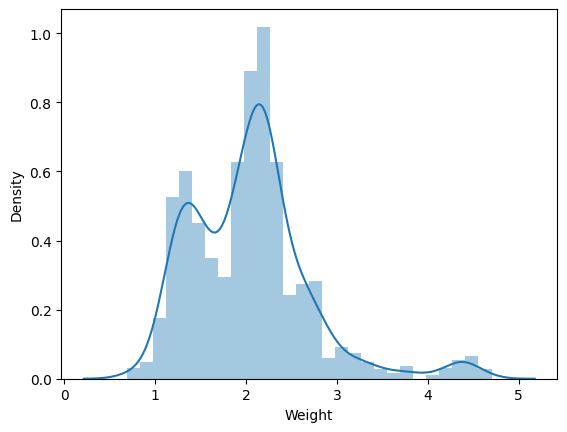

In [88]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

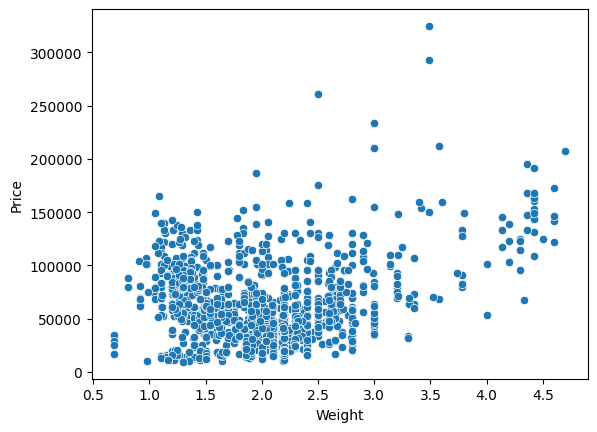

In [89]:
sns.scatterplot(x=df['Weight'], y=df['Price'])

**Weight Analysis**
- We can see there is a weak relation between weight and price.
- As weight increases, the price also increases slightly.

In [90]:
df.corr(numeric_only=True)

,Ram,Weight,Price,TouchScreen,IPS,PPI,CpuSpeed,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305704,0.367764,0.097704,0.603865
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321866,0.320090,0.514211,-0.062888
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475387,0.430122,-0.095304,0.670543
TouchScreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458566,-0.081681,-0.208018,0.257360
IPS,0.207949,0.018643,0.253320,0.148026,1.000000,0.299151,0.063833,-0.092436,0.224522
PPI,0.305704,-0.321866,0.475387,0.458566,0.299151,1.000000,0.044547,-0.293005,0.509326
CpuSpeed,0.367764,0.320090,0.430122,-0.081681,0.063833,0.044547,1.000000,0.129968,0.255038
HDD,0.097704,0.514211,-0.095304,-0.208018,-0.092436,-0.293005,0.129968,1.000000,-0.396753
SSD,0.603865,-0.062888,0.670543,0.257360,0.224522,0.509326,0.255038,-0.396753,1.000000


<Axes: >

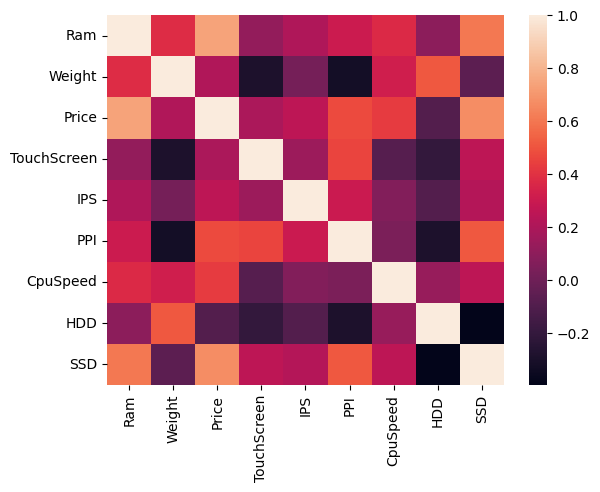

In [91]:
sns.heatmap(df.corr(numeric_only=True))

C:\Users\PMLS\AppData\Local\Temp\ipykernel_4600\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

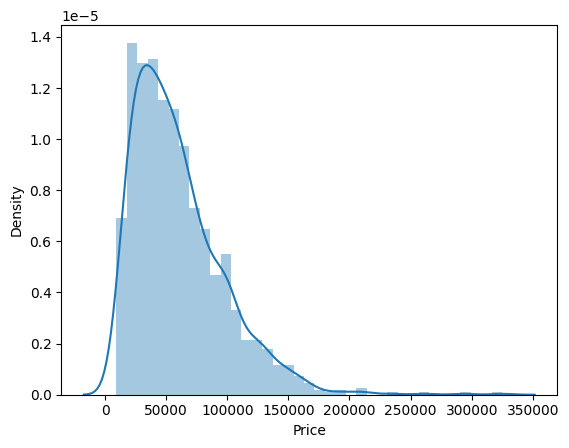

In [92]:
sns.distplot(df['Price'])

C:\Users\PMLS\AppData\Local\Temp\ipykernel_4600\3074529360.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

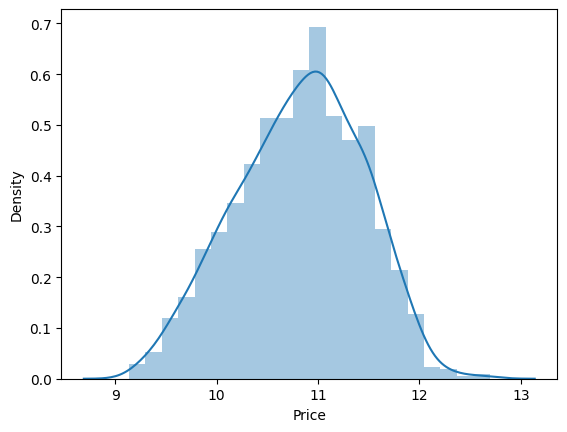

In [93]:
# skewness in target col can disturb ML models
# we can apply log
sns.distplot(np.log(df['Price']))

So when we extract X and Y we will apply log transformation on Y

### Save Clean Dataset

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   OpSys        1302 non-null   object 
 4   Weight       1302 non-null   float32
 5   Price        1302 non-null   float64
 6   TouchScreen  1302 non-null   int64  
 7   IPS          1302 non-null   int64  
 8   PPI          1302 non-null   float64
 9   CpuBrand     1302 non-null   object 
 10  CpuSpeed     1302 non-null   float64
 11  HDD          1302 non-null   int64  
 12  SSD          1302 non-null   int64  
 13  GpuBrand     1302 non-null   object 
dtypes: float32(1), float64(3), int32(1), int64(4), object(5)
memory usage: 142.4+ KB


In [95]:
df.to_csv("clean_laptop_data.csv", index=False)